In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [189]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDRegressor
from prepareData1 import separateTrainAndMissedDF

In [190]:
# original_df = pd.read_csv('CreditDataset_with_missing_income.csv')
original_df = pd.read_csv('WithIncomeAndPD_missingFirst100Income.csv')
categorial_feature_names=['Home', 'Marital','Job']
numeric_features_names = ['Seniority', 'Time', 'Age', 'Records', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price']
missing_values = {'Income': [0,99999999], 'Assets': [99999999], 'Debt': [99999999], 'Home': [0]}
target = 'Income'
estimator_dict = {'Home': DecisionTreeClassifier(max_depth= 7, criterion = 'entropy'), 'Income': SGDRegressor(loss = 'squared_loss')}

In [191]:
final_train_df,final_predict_df, target_df, df_with_missing_target = separateTrainAndMissedDF(original_df, categorial_feature_names, numeric_features_names, missing_values, target)

C:\Users\Dmitry_Nikiforov\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [192]:
estimator = estimator_dict[target]

In [193]:
def predict_and_get_enhance_data(train_x, train_y, test_prepare_x, test_x, target, estimator_dict):
    estimator = estimator_dict[target]
    estimator.fit(train_x.values, train_y.values)
    predicted_target = pd.Series(data = estimator.predict(test_prepare_x), index = test_prepare_x.index).to_frame(target)
    predicted_data = pd.merge(test_x, predicted_target, how='left', left_index=True, right_index=True)
    return predicted_data

In [194]:
predict_and_get_enhance_data(final_train_df, target_df, final_predict_df, df_with_missing_target, target, estimator_dict).head()

C:\Users\Dmitry_Nikiforov\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Assets,Debt,Amount,Price,ProbDef,Income
0,9,1,60,30,2,1,3,73,0,0,800,846,0.333442,92.758405
1,17,1,60,58,3,1,1,48,0,0,1000,1658,0.047325,84.471498
2,10,2,36,46,2,2,3,90,3000,0,2000,2985,0.386905,92.989837
3,0,1,60,24,1,1,1,63,2500,0,900,1325,0.215978,93.184988
4,0,1,36,26,1,1,1,46,0,0,310,910,0.234322,93.715195


In [195]:
estimator.fit(final_train_df, target_df)

C:\Users\Dmitry_Nikiforov\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [196]:
y_predict = pd.Series(estimator.predict(final_train_df), index = final_train_df.index).to_frame('y_predict')
y_orig = pd.Series(target_df).to_frame('y_orig')
income = pd.Series(estimator.predict(final_predict_df), index = final_predict_df.index).to_frame('income')

In [197]:
diff_between_y = pd.merge(y_predict, y_orig, how='left', left_index=True, right_index=True)

In [198]:
diff_between_y.head()

,y_predict,y_orig
100,93.694069,91.669400
101,92.767008,92.141859
102,92.570882,95.677704
103,91.299021,94.458555
104,92.009571,92.515056


In [199]:
from sklearn.metrics import mean_squared_error
sklearn_mse = (mean_squared_error(y_orig, y_predict))
print("MSE = {}".format(sklearn_mse))

MSE = 11.403856268135508


Monte Carlo

In [200]:
df_with_missing_target.head()

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Assets,Debt,Amount,Price,ProbDef
0,9,1,60,30,2,1,3,73,0,0,800,846,0.333442
1,17,1,60,58,3,1,1,48,0,0,1000,1658,0.047325
2,10,2,36,46,2,2,3,90,3000,0,2000,2985,0.386905
3,0,1,60,24,1,1,1,63,2500,0,900,1325,0.215978
4,0,1,36,26,1,1,1,46,0,0,310,910,0.234322


In [201]:
result = pd.merge(df_with_missing_target, income, how='left', left_index=True, right_index=True)

In [202]:
result.head()

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Assets,Debt,Amount,Price,ProbDef,income
0,9,1,60,30,2,1,3,73,0,0,800,846,0.333442,93.106163
1,17,1,60,58,3,1,1,48,0,0,1000,1658,0.047325,84.408126
2,10,2,36,46,2,2,3,90,3000,0,2000,2985,0.386905,92.492906
3,0,1,60,24,1,1,1,63,2500,0,900,1325,0.215978,93.533156
4,0,1,36,26,1,1,1,46,0,0,310,910,0.234322,94.393756


In [203]:
first_row = result.iloc[0].values

In [204]:
first_row.size

14

In [205]:
def compute_with_monte_carlo(row, dist, dist_index, rule):
    repeated = np.repeat(row[np.newaxis,:], len(dist), axis=0)
    repeated[:,dist_index] = dist
    return rule(*repeated.T)

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

In [216]:
EL_func = lambda Seniority, Home, Time, Age, Marital, Records, Job, Expenses, Assets, Debt, Amount, Price, ProbDef, Income: Amount/(np.sqrt(Income))*(1+(0.5*Income*Time)/Amount)

In [209]:
mean = first_row[first_row.size - 1]
std = sklearn_mse
amount_iter = 1000

In [210]:
print("Mean = {}, Std = {}".format(mean, std))

Mean = 93.10616348635358, Std = 11.403856268135508


C:\Users\Dmitry_Nikiforov\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


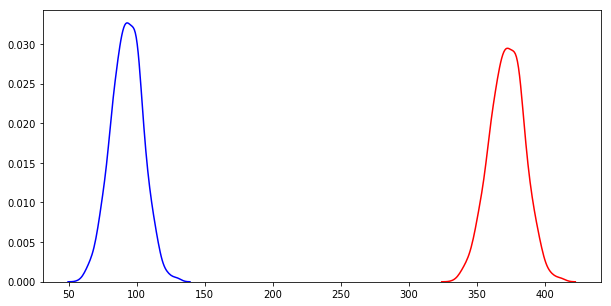

In [217]:
dist = np.random.normal(mean, std, amount_iter)
dist_index = first_row.size - 1 
monte_carlo_result = compute_with_monte_carlo(first_row, dist, dist_index, EL_func)

fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(dist, color='b', ax=ax);
sns.kdeplot(monte_carlo_result, color='r', ax=ax);

========================================================================================